In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
from imblearn import over_sampling

from imblearn.over_sampling import SMOTE

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in

In [2]:
email = pd.read_csv('/Users/apple/Downloads/DS_Projects/Email Project/emails1(1)')

In [3]:
email.head()

,Unnamed: 0,filename,Message-ID,content,Class
0,0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,Abusive
2,2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,Gentlemen:\nThe following champagne is availab...,Abusive
3,3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i've taken so long...just been trying to...,Abusive
4,4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive


# EDA

In [4]:
email.dtypes

Unnamed: 0     int64
filename      object
Message-ID    object
content       object
Class         object
dtype: object

In [5]:
email1=email.drop(email.columns[[0,1,2]],axis=1)
email1.head()

,content,Class
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,fuck you,Abusive
2,Gentlemen:\nThe following champagne is availab...,Abusive
3,sorry i've taken so long...just been trying to...,Abusive
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive


In [6]:
email1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48076 entries, 0 to 48075
Data columns (total 2 columns):
content    48076 non-null object
Class      48076 non-null object
dtypes: object(2)
memory usage: 751.3+ KB


In [7]:
# Finding numner of null values
email1.isnull().sum()

content    0
Class      0
dtype: int64

In [8]:
#Shape of email 
email1.shape

(48076, 2)

In [9]:
#Total numnber of unique in each Variable
email1.nunique()

content    24656
Class          2
dtype: int64

In [10]:
#Drop duplicate rows in Pandas based on column
df=email1.drop_duplicates(subset='content', keep="first")
df.shape

(24656, 2)

In [12]:
#count of Class Variable 
df["Class"].value_counts()

Non Abusive    23014
Abusive         1642
Name: Class, dtype: int64

In [13]:
#finding the email["Class"] value_counts in percentage
df["Class"].value_counts()*100/len(df)

Non Abusive    93.340363
Abusive         6.659637
Name: Class, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

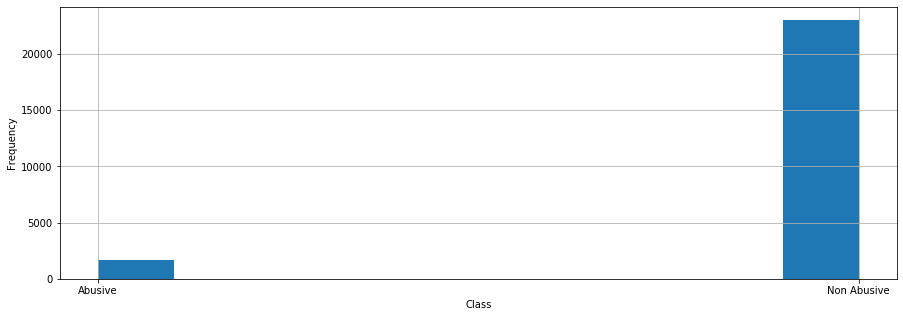

In [14]:
#Histogram of email["Class"] to find whether data is balanced
df["Class"].hist(figsize=(15,5))
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show

In [15]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

In [ ]:
df['polarity'] = df['content'].apply(pol)
df['subjectivity'] = df['content'].apply(sub)
df.head()

[Text(0, 0.5, 'probability'), Text(0.5, 0, 'polarity')]

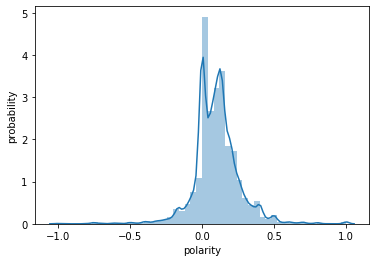

In [18]:
ax=sns.distplot(df['polarity'],bins=50)
ax.set(xlabel="polarity", ylabel = "probability")

In [19]:
#text length
df['text_len'] = df['content'].str.len()   ## this also includes spaces
df.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,content,Class,polarity,subjectivity,text_len
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive,-0.183333,0.566667,220
1,fuck you,Abusive,-0.400000,0.600000,8
2,Gentlemen:\nThe following champagne is availab...,Abusive,0.000000,0.295000,612
3,sorry i've taken so long...just been trying to...,Abusive,-0.471759,0.330556,505
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive,-0.166667,0.333333,203


In [20]:
df['text_len'].describe()

count     24656.000000
mean       1798.708306
std        5394.644531
min           1.000000
25%         264.000000
50%         729.000000
75%        1748.000000
max      272036.000000
Name: text_len, dtype: float64

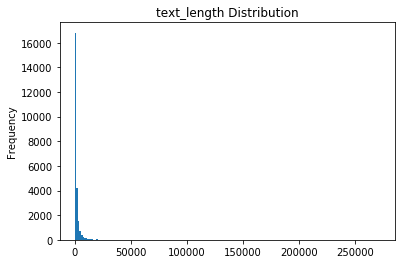

In [21]:
#Histogram of df['text_len']
df['text_len'].plot(kind='hist',bins=200,title='text_length Distribution')

[Text(0, 0.5, 'probability'),
 Text(0.5, 0, 'count'),
 Text(0.5, 1.0, 'text_length Distribution')]

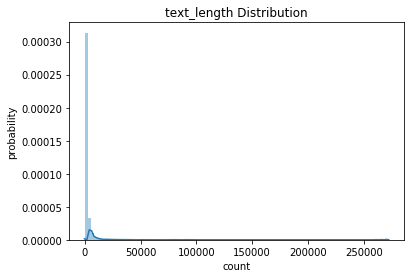

In [22]:
ax=sns.distplot(df['text_len'],bins=100)
ax.set(xlabel="count", ylabel = "probability",title='text_length Distribution')

In [23]:
# Number of Words
df['word_count'] = df['content'].apply(lambda x: len(str(x).split(" ")))
df.loc[:,('content','word_count')].head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,content,word_count
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,24
1,fuck you,2
2,Gentlemen:\nThe following champagne is availab...,131
3,sorry i've taken so long...just been trying to...,66
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,26


In [24]:
df['word_count'].describe()

count     24656.000000
mean        344.102287
std        2715.771262
min           1.000000
25%          38.000000
50%         111.000000
75%         262.000000
max      124757.000000
Name: word_count, dtype: float64

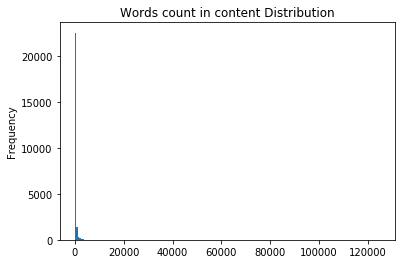

In [26]:
#Histogram of email["Class"] to find whether data is balanced
df["word_count"].plot(kind='hist',bins=200,title='Words count in content Distribution')

[Text(0, 0.5, 'probability'),
 Text(0.5, 0, 'count'),
 Text(0.5, 1.0, 'Word count in content distribution')]

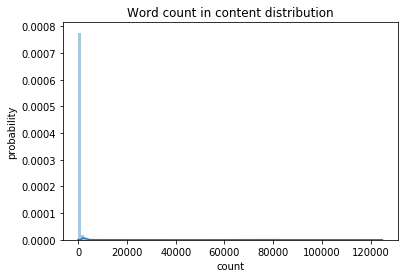

In [27]:
ax1=sns.distplot(df['word_count'],bins=100)
ax1.set(xlabel="count", ylabel = "probability",title='Word count in content distribution')

In [28]:
df.head()

,content,Class,polarity,subjectivity,text_len,word_count
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive,-0.183333,0.566667,220,24
1,fuck you,Abusive,-0.400000,0.600000,8,2
2,Gentlemen:\nThe following champagne is availab...,Abusive,0.000000,0.295000,612,131
3,sorry i've taken so long...just been trying to...,Abusive,-0.471759,0.330556,505,66
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive,-0.166667,0.333333,203,26


In [29]:
df.isnull().sum()

content         0
Class           0
polarity        0
subjectivity    0
text_len        0
word_count      0
dtype: int64

# Pre-processing


In [11]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
wnl = WordNetLemmatizer()
from textblob import TextBlob
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

[nltk_data] Downloading package wordnet to /Users/apple/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/apple/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
corpus = []
def data_clean(data):
    wnl = nltk.WordNetLemmatizer()
    for i in data:
        review = re.sub('[^a-zA-Z]',' ',str(i))#remove all except a-z A-Z text
        review = review.lower()#to lowercase
        review = review.split()#split the text
        review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
        review = [wnl.lemmatize(word) for word in review]
        review = ' '.join(review)
        corpus.append(review)

In [13]:
data_clean(df['content'])

In [14]:
corpus

['eat shit john j lavorato excelr pm john arnold hou ect ect cc subject footbal bet minn buff phil indi cinnci det clev den dall jack',
 'fuck',
 'gentleman follow champagn avail approxim retail price also interest trade red wine retail price deriv spec websit winesearc com wine store temperatur control privat wine storag facil quan vintag wine retail perrier jouet brut fleur de champagn piper heidsek reserv dom perignon veuv cliquot ponsardin la grand dame taitteng millesin brut jacquart millesin roeder cristal interest',
 'sorri taken long tri fend chick life sooooo hard sometim monkey brian rourk excelr commun john arnold hou ect ect cc subject yeah monkey monkey hey littl bastard fuck pictur e compani think help score woman say balanc sheet yeah monkey b',
 'asshol john j lavorato excelr john arnold hou ect ect cc subject john cant seem make gambl problem go away bill denver jack',
 'asshol john j lavorato excelr john arnold hou ect ect cc subject ram wash raider balt bear lion eag

In [51]:
df['cleaned_content']=corpus

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
df.head()

,content,Class,polarity,subjectivity,text_len,word_count,cleaned_content
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive,-0.183333,0.566667,220,24,eat shit john j lavorato excelr pm john arnold...
1,fuck you,Abusive,-0.400000,0.600000,8,2,fuck
2,Gentlemen:\nThe following champagne is availab...,Abusive,0.000000,0.295000,612,131,gentleman follow champagn avail approxim retai...
3,sorry i've taken so long...just been trying to...,Abusive,-0.471759,0.330556,505,66,sorri taken long tri fend chick life sooooo ha...
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive,-0.166667,0.333333,203,26,asshol john j lavorato excelr john arnold hou ...


In [53]:
print('5 random reviews with the highest positive sentiment polarity: \n')
cl = df.loc[df.polarity == 1, ['cleaned_content']].sample(5).values
for c in cl:
    print(c[0])

5 random reviews with the highest positive sentiment polarity: 

dear salli request best regard shona
dear salli list peopl came saturday none u mind would like whatev help risk control prepar dpr chri abel johnni kenneth thibodeaux john allison risk analyt tom victorio keith considin susan trevino merchant asset susi ayala also best regard shona x
congratul salli promot hope bode well wonder regard heidi
lynn reach sunday holiday great time fran fagan sr hr rep excelr transport servic fran fagan excelr com
test success way go


In [55]:
print('5 random reviews with the most neutral sentiment(zero) polarity: \n')
cl = df.loc[df.polarity == 0, ['cleaned_content']].sample(5).values
for c in cl:
    print(c[0])

5 random reviews with the most neutral sentiment(zero) polarity: 

cgoer nyiso com write nyiso tech exchang discus list nyiso reserv hour begin may real time market well follow hour per eca b verifi price pjm oh hq ne price may day ahead market correct e mail inform copi offici post found follow address websit http mi nyiso com public htm opermessag currentopermessag htm mm
well deserv recognit alway look someon get thing done friendliest manner possibl vasant
follow name overlay done today cominco ltd teck cominco metal ltd
corona jpg sail jpg sail jpg
plea respond e mail account monitor ap user attach payment propos busi unit plea review forward approv cao thank sap ap team enwc xl


In [57]:
print(' reviews with the most negative polarity: \n')
cl = df.loc[df.polarity == -1, ['cleaned_content']].sample(2).values
for c in cl:
    print(c[0])

 reviews with the most negative polarity: 

cow come home chicken hatch fat ladi sang horribl
aw close


In [34]:
len(corpus)

24656

In [25]:
# Creating the TF-IDF model
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(ngram_range=(1, 2), stop_words='english')
X = cv.fit_transform(corpus)
X.shape

(24656, 1208684)

In [41]:
import pickle
# Saving model to disk
pickle.dump(cv, open('transform1.pkl','wb'))

In [26]:
#Y= independent variable
y=df.iloc[:,1:2]
Y=np.ravel(y)
Y

array(['Abusive', 'Abusive', 'Abusive', ..., 'Non Abusive', 'Non Abusive',
       'Non Abusive'], dtype=object)

In [27]:
Y.shape

(24656,)

In [28]:
#train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [29]:
print(X_train.shape)
print(Y_train.shape)

(17259, 1208684)
(17259,)


# MultinomialNB without using oversampling

In [30]:
from sklearn.naive_bayes import MultinomialNB
MNB =MultinomialNB()
MNB.fit(X_train,Y_train)

MultinomialNB()

In [31]:
y_predict=MNB.predict(X_test)
y_predict

array(['Non Abusive', 'Non Abusive', 'Non Abusive', ..., 'Non Abusive',
       'Non Abusive', 'Non Abusive'], dtype='<U11')

In [32]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
print(confusion_matrix(Y_test,y_predict))
print(classification_report(Y_test,y_predict))
print(accuracy_score(Y_test,y_predict))

[[  16  474]
 [   0 6907]]
              precision    recall  f1-score   support

     Abusive       1.00      0.03      0.06       490
 Non Abusive       0.94      1.00      0.97      6907

    accuracy                           0.94      7397
   macro avg       0.97      0.52      0.52      7397
weighted avg       0.94      0.94      0.91      7397

0.935919967554414


# MultinomialNB using oversampling

In [33]:
abusive=df[df['Class']=='Abusive']
non_abusive=df[df['Class']=='Non Abusive']
print(abusive.shape,non_abusive.shape)

(1642, 2) (23014, 2)


In [34]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=4)
X_train1, y_train1 = sm.fit_sample(X_train, Y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [35]:
X_train1.shape,y_train1.shape

((32214, 1208684), (32214,))

In [36]:

from collections import Counter
print('Original dataset shape {}'.format(Counter(Y_train)))
print('Resampled dataset shape {}'.format(Counter( y_train1)))

Original dataset shape Counter({'Non Abusive': 16107, 'Abusive': 1152})
Resampled dataset shape Counter({'Non Abusive': 16107, 'Abusive': 16107})


In [37]:
MNB_sm =MultinomialNB()
MNB_sm.fit(X_train1, y_train1)

MultinomialNB()

In [38]:
y_predict_sm=MNB_sm.predict(X_test)
y_predict_sm

array(['Non Abusive', 'Non Abusive', 'Non Abusive', ..., 'Non Abusive',
       'Non Abusive', 'Non Abusive'], dtype='<U11')

In [39]:
print(confusion_matrix(Y_test,y_predict_sm))
print(classification_report(Y_test,y_predict_sm))
print(accuracy_score(Y_test,y_predict_sm))

[[ 415   75]
 [ 289 6618]]
              precision    recall  f1-score   support

     Abusive       0.59      0.85      0.70       490
 Non Abusive       0.99      0.96      0.97      6907

    accuracy                           0.95      7397
   macro avg       0.79      0.90      0.83      7397
weighted avg       0.96      0.95      0.95      7397

0.9507908611599297


In [40]:
from sklearn.model_selection import cross_val_score
MNB_sm_scores = cross_val_score(MNB_sm,X_train1, y_train1, cv=5)
print(MNB_sm_scores)
print(np.average(MNB_sm_scores))

[0.97827099 0.9762533  0.97563247 0.97780537 0.97702577]
0.9769975795675429


In [42]:
import pickle
# Saving model to disk
pickle.dump(MNB_sm, open('MNB_sm_model1.pkl','wb'))